# Visualisations of Bloch Sphere Dynamics
## Dhruv Aryan
## Final Project - Advanced Quantum Mechanics (PHY-4540)
## Instructor: Prof. Arjendu Pattanayak

### Introduction

In this course, we have studied open quantum systems, in which we saw that a powerful way to describe the state of an open quantum system is through the language of density matrices, which is an object that describes an ensemble of quantum systems. We developed an object to geometrically visualise such states - the Bloch sphere. Any state of a qubit can be mapped onto the Bloch sphere. Pure states are on the sphere, while mixed states are inside the sphere. We then discussed the discrete time evolution of open quantum systems in the form of Kraus operators. We analytically computed the results of evolving qubits through various standard channels such as the dephasing, amplitude damping and depolarizing channels, and studied how the state representations on the Bloch sphere evolve, thereby analysing the evolution of the Bloch sphere itself. However, it would be neat to be able to actually see this evolution visually. Further, if we combine the Kraus operators of some of these channels, it is difficult to analytically calculate the evolution of the Bloch sphere, so we might want to develop a method of investigating this evolution without relying on analytical calculations. In this project, I aim to do exactly this. The goal of this project is to code visualisations of Bloch sphere dynamics using the Python library QuTiP.

QuTiP is an open-source software used to simulate the dynamics of open quantum systems. It provides effecient numerical simulations for a wide variety of Hamiltonians. In this project, I hope to primarily use its Bloch sphere visualisation features. We begin by importing the necessary libraries.

In [1]:
from qutip import *
from qutip import gates
import numpy as np
import matplotlib.pyplot as plt

### Basics of QuTiP

One key difference between classical and quantum systems is the use of operators instead of numbers as variables. We also need to specify state vectors and their properties. Therefore, we need a data structure that encapsulates the properties of quantum states and operators. This is done by the quantum object class `qutip.Qobj`. 

We can start with creating a blank `Qobj`.

In [2]:
print(Qobj())

Quantum object: dims=[[1], [1]], shape=(1, 1), type='scalar', dtype=Dense
Qobj data =
[[nan]]


Now, let us create states. First, a ket vector:

In [3]:
print(Qobj([[1],[2],[3],[4],[5]]))

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


Now, a bra vector:

In [4]:
x = np.array([[1,2,3,4,5]])
print(Qobj(x))

Quantum object: dims=[[1], [5]], shape=(1, 5), type='bra', dtype=Dense
Qobj data =
[[1. 2. 3. 4. 5.]]


We can also construct operators in this way. There are many operators which are already predefined. For instance, the spin operators, represented in matrix form by the Pauli matrices, are obtained as follows.

In [5]:
print(sigmaz())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


### The Bloch Sphere

Now that we have a grasp of the basics of QuTiP, let us approach the main problem of this project by understanding how to deal with the Bloch sphere. The Bloch sphere is a geometrical representation of the state space of a qubit. All pure states of a qubit are on the surface of the sphere, and all pure state Hermitian qubit operations are mappings on this surface. Mixed states of a qubit are points within the sphere.

There is a class to allow for easy creation and manipulation of data sets, both vectors and data points, on the Bloch sphere. We can create a Bloch sphere as follows.

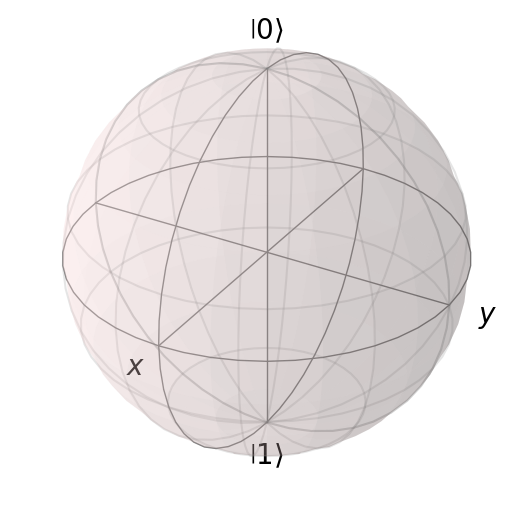

In [6]:
b = qutip.Bloch()
b.show()

### Points and Vectors on the Bloch Sphere

We can add points by specifying the Cartesian coordinates of the point:

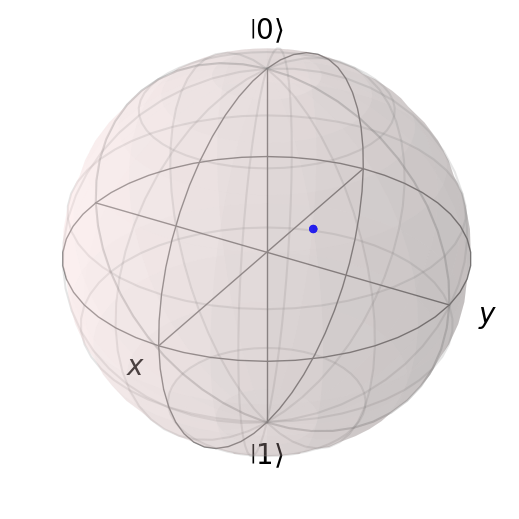

In [7]:
b.clear()
pnt = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]
b.add_points(pnt)
b.show()

Now we can add a vector:

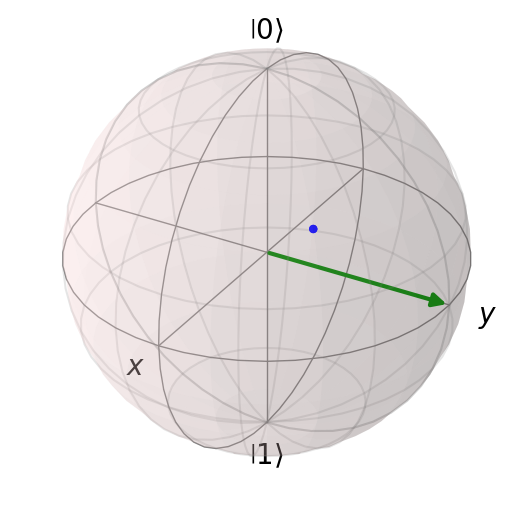

In [8]:
vec = [0, 1, 0]
b.add_vectors(vec)
b.show()

Now we are ready to start attempting to visualise Bloch sphere dynamics. We will first look at the effects of various standard channels on a qubit on the Bloch sphere.

### Bit Flip Error Channel

The action of this channel on a qubit is to "flip" a bit, i.e. to turn $|0\rangle$ to $|1\rangle$ and vice-versa. In general, the action on an arbitrary state $|\psi\rangle$ is given by
\begin{equation}
|\psi\rangle \rightarrow \sigma_x|\psi\rangle
\end{equation}

We start with the $|0\rangle$ state.

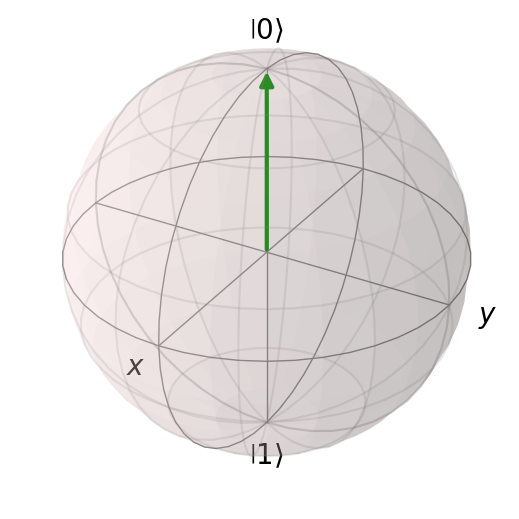

In [9]:
b.clear()
psi=(qutip.basis(2, 0) + (0+0j)*qutip.basis(2, 1)).unit()
phi=(qutip.basis(2, 0) + (1+0j)*qutip.basis(2, 1)).unit()
b.add_states(psi)
b.show()

Now, we "turn on" the channel. This results in the following state:

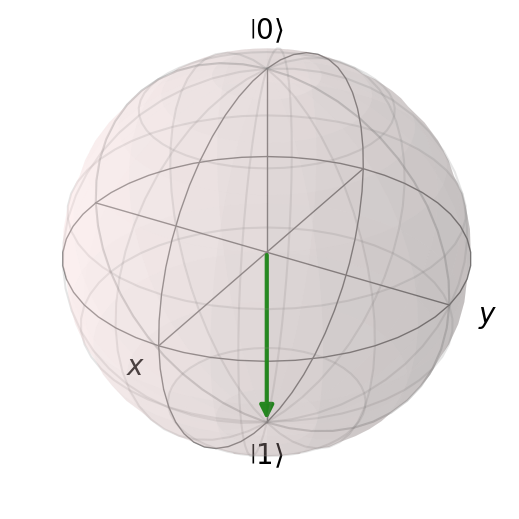

In [10]:
psi_bf = sigmax()*psi
b.clear()
b.add_states(psi_bf)
b.render()
b.show()

This shows us visually that we get $|0\rangle\rightarrow|1\rangle$, thus verifying that everything is working as expected so far.

### Phase Flip Error Channel

The action of this channel on a qubit is to "flip" the phase, i.e. to turn $|+x\rangle$ to $|-x\rangle$ and vice-versa. In general, the action on an arbitrary state $|\psi\rangle$ is given by
\begin{equation}
|\psi\rangle \rightarrow \sigma_z|\psi\rangle
\end{equation}

We start with the $|+x\rangle$ state.

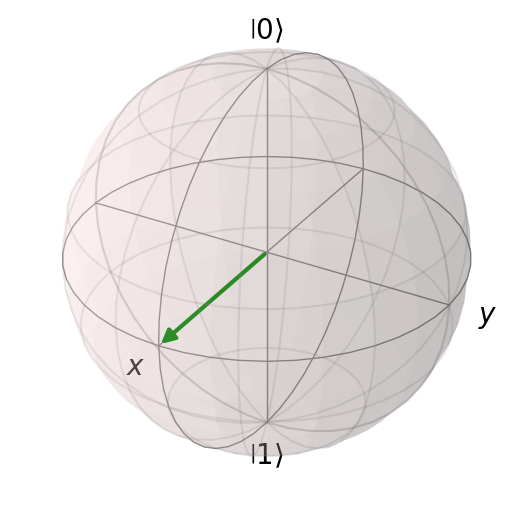

In [11]:
b.clear()
b.add_states(phi)
b.render()
b.show()

Now, we "turn on" the channel. This results in the following state:

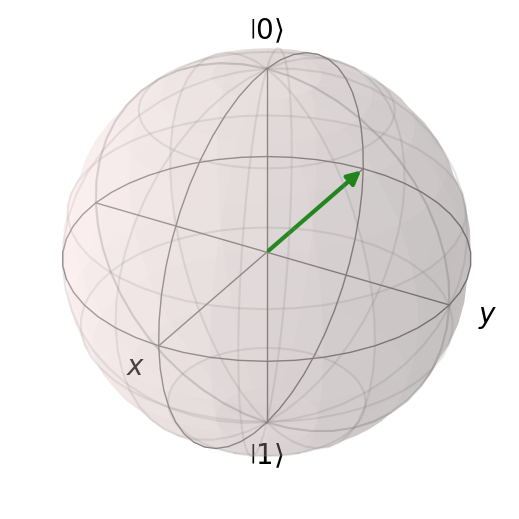

In [12]:
phi_pf = sigmay()*phi
b.clear()
b.add_states(phi_pf)
b.render()
b.show()

This confirms the expected result that $|+x\rangle\rightarrow|-x\rangle$.

### Hadamard

The action of this channel is to take $|0\rangle$ to $|+x\rangle$ and vice-versa, and also $|1\rangle$to $|-x\rangle$. In matrix form, the Hadamard operator can be written as
\begin{equation}
H = \begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
\end{equation}

The Hadamard is a predefined gate in QuTiP, so we can easily call it:

In [13]:
H = gates.hadamard_transform()

Applying the Hadamard to $|0\rangle$, we get

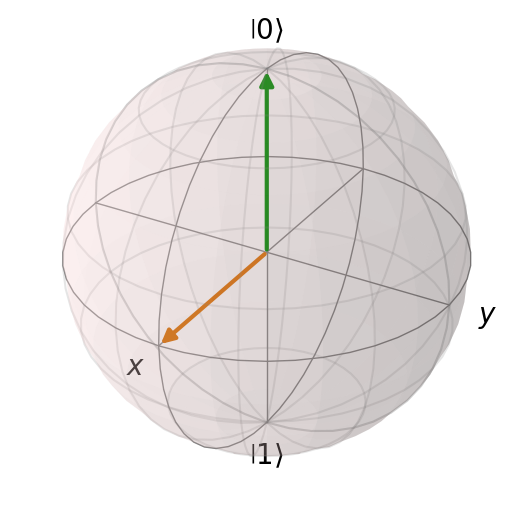

In [14]:
b.clear()
psi_H = H*psi
b.add_states(psi)
b.add_states(psi_H)
b.render()
b.show()

Here, the green vector represents the initial state and the orange vector represents the final state. We see that $|0\rangle\rightarrow|+x\rangle$. Applying the Hadamard to $|1\rangle$ instead, we get

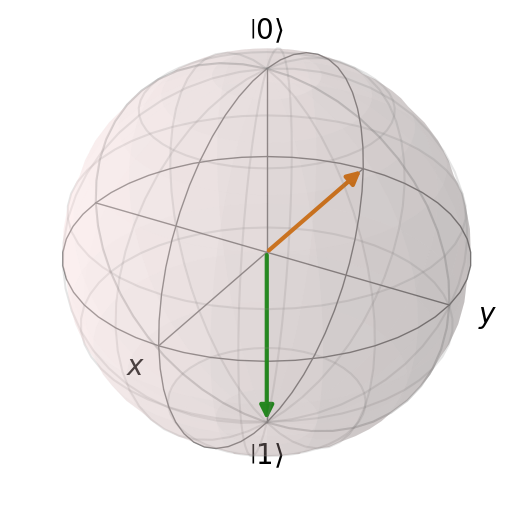

In [15]:
psi1=(qutip.basis(2, 1) + (0+0j)*qutip.basis(2, 1)).unit()
psi1_H=H*psi1
b.clear()
b.add_states(psi1)
b.add_states(psi1_H)
b.render()
b.show()

Here, the green vector represents the initial state and the orange vector represents the final state. We see that $|1\rangle\rightarrow|-x\rangle$.

This confirms that the Hadamard is acting as we would expect it to. Now, we want to see the evolution of open systems under physical processes besides errors, and for that, we use the Kraus operator formalism.

### Kraus Operators

Let us consider a system and a bath such that they evolve under a joint unitary. If $\rho_s(t)$ denotes the state at time $t$, then we have
\begin{equation}
\rho_s(t) = \sum_{\alpha}K_{\alpha}(t)\rho_s(0)K_{\alpha}^\dagger
\end{equation}
The operators {$K_\alpha$} are the Kraus operators. Thus, the Kraus operators govern the evolution of the system. If the representation of a state on the Bloch sphere is a vector $v$, then on each application of the Kraus operators, it evolves as
\begin{equation}
\vec{v} \rightarrow \vec{v}' = M\vec{v} + \vec{c}
\end{equation}
where
\begin{equation}
M_{ij} = \frac{1}{2}\sum_\alpha\text{Tr}(\sigma_i K_\alpha \sigma_j K_\alpha^\dagger)
\end{equation}
and
\begin{equation}
c_i = \frac{1}{2}\sum_\alpha\text{Tr}(\sigma_i K_\alpha K_\alpha^\dagger)
\end{equation}
Here, $\sigma_i$ represents the spin operators. We will use these equations to simulate the effects of the Kraus operators on the Bloch sphere.

### Visualising Kraus Operators on the Bloch Sphere

We will first store the spin and identity operators.

In [16]:
I, X, Y, Z = qeye(2), sigmax(), sigmay(), sigmaz()
S = np.array([X,Y,Z])

Now, we define a function `kraus` that takes a valid set of Kraus operators and a set of points on or in the Bloch sphere as inputs, and returns a plot of the initial state and final state on the Bloch sphere. We do this by computing the objects $M$ and $c$ from the Kraus operators specified to evolve the vector according to the equations given above.

In [17]:
def kraus(K, pnts):
    
    # First, we define empty arrays to store M and C
    
    M = np.zeros(shape=(3,3), dtype='complex')
    c = np.zeros(3, dtype='complex')
    
    # Next, we compute each element of M and c
    
    for i in range(3):
        for j in range(3):
            s = 0
            t = 0
            for k in K:
                A = S[i]*k*S[j]*k.dag()
                s += A.tr()
            M[i][j] = 0.5*s
        for k in K:
            B = S[i]*k*k.dag()
            t += B.tr()
        c[i] = 0.5*t
        
    # We then apply this transformation to the vector 100 times
    
    [xp,yp,zp] = pnts
    
    xp100 = xp
    yp100 = yp
    zp100 = zp
    for iter in range(100):
        xp100 = [M[0][0]*xp100[i] + M[0][1]*yp100[i] + M[0][2]*zp100[i] + c[0] for i in range(len(pnts[0]))]
        yp100 = [M[1][0]*xp100[i] + M[1][1]*yp100[i] + M[1][2]*zp100[i] + c[1] for i in range(len(pnts[0]))]
        zp100 = [M[2][0]*xp100[i] + M[2][1]*yp100[i] + M[2][2]*zp100[i] + c[2] for i in range(len(pnts[0]))]
        pnts100 = [xp100,yp100,zp100]
    
    # Finally, we plot the initial and final states
    
    b.clear()
    b.add_points(pnts)
    b.render()
    b.show()

    b.clear()
    b.add_points(pnts100)
    b.render()
    b.show()

Now, we might need to check if these Kraus operators are a valid set. For that, we use the following condition:
\begin{equation}
\sum_\alpha K_\alpha^\dagger K_\alpha = I
\end{equation}

We define a function `is_kraus` which takes a set of Kraus operators, computes the sum of the left hand side of the equation above and checks whether it satisfies the condition or not.

In [18]:
def is_kraus(K):
    sum = 0
    for k in K:
        sum += k.dag()*k
    if sum == I:
        print("Yes!")
    else:
        print("No")

Now, we are ready to simulate the evolution of states on the Bloch sphere under the effects of various sets of Kraus operators. While we can do this for any arbitrary set of points inside or on the sphere, we will begin by choosing all the points on the surface of the sphere. This, in effect, tells us how the surface of the Bloch sphere evolves.

In [19]:
xp0 = []
yp0 = []
zp0 = []

for phi in np.linspace(0, 2*np.pi, 100):
    for th in np.linspace(0, np.pi, 100):
        xp0.append(np.sin(th)*np.cos(phi))
        yp0.append(np.sin(th)*np.sin(phi))
        zp0.append(np.cos(th))
pnts0 = [xp0, yp0, zp0]

We will first investigate evolution under some standard channels that we discussed in class, and we will then venture towards using sets of Kraus operators that we have not yet studied analytically to evolve our states on the Bloch sphere.

### The Phase Damping Channel

Under a single application of the phase damping channel, or dephasing channel, the state either experiences a phase flip with probability $P$, or remains unchanged with probability $1-P$. The Kraus operators are thus given by
\begin{equation}
K_0 = \sqrt{1-\frac{P}{2}}I, \quad\quad K_1 = \sqrt{\frac{P}{2}}\sigma_z
\end{equation}

Let us store these Kraus operators with $P=0.5$

In [20]:
P = 0.5
K_ph0 = (np.sqrt(1-(P/2)))*I
K_ph1 = (np.sqrt(P/2))*Z
K_ph = np.array([K_ph0, K_ph1])

Now, let us feed the array `K_ph` into our function.

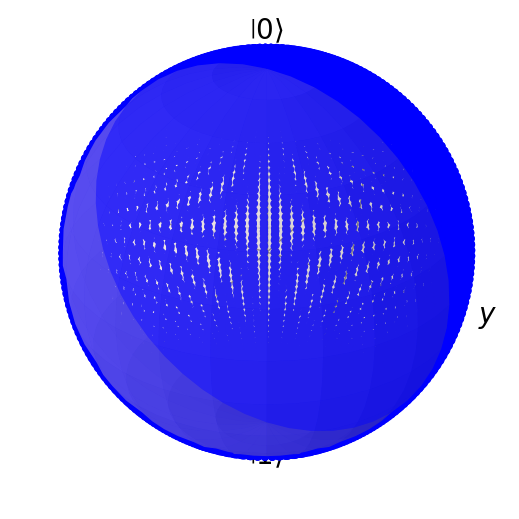

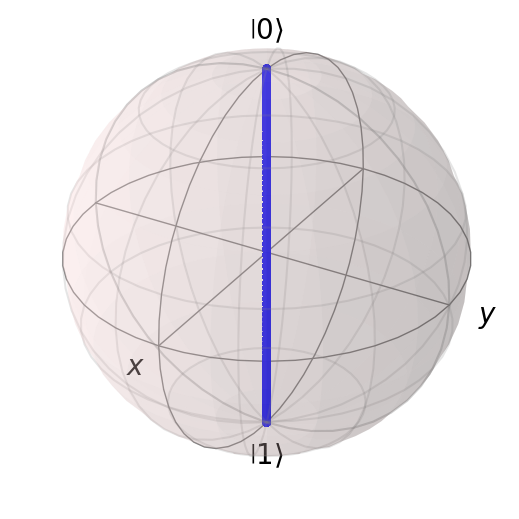

In [21]:
kraus(K_ph, pnts0)

Thus, we see that the set of possible pure states approaches a line passing through the poles of the Bloch sphere. This means that the phase of each state is damped upon repeated applications of the channel. Therefore, the phase damping channel is acting as expected.

### The Amplitude Damping Channel

The Kraus operators for this channel are given by
\begin{equation}
K_0 = \begin{pmatrix} 1 & 0\\0 & \sqrt{1-\gamma} \end{pmatrix}, \quad\quad K_1 = \begin{pmatrix} 0 & \sqrt{\gamma}\\0 & 0 \end{pmatrix}
\end{equation}

Let us store these Kraus operators with $\gamma=0.5$

In [22]:
gamma = 0.5
K_amp0 = Qobj([[1,0],[0,np.sqrt(1-gamma)]])
K_amp1 = Qobj([[0,np.sqrt(gamma)],[0,0]])
K_amp = np.array([K_amp0, K_amp1])

Now, let us feed the array `K_amp` into our function.

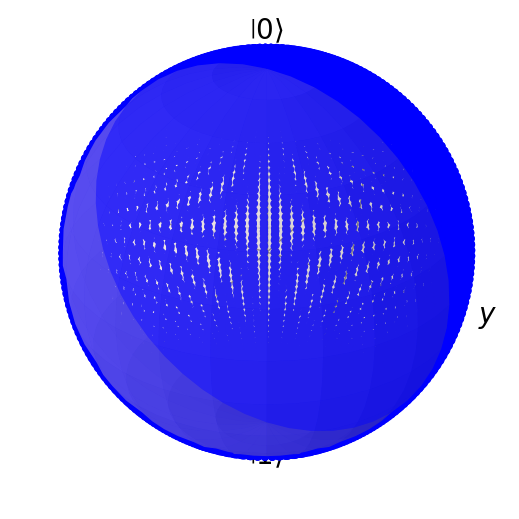

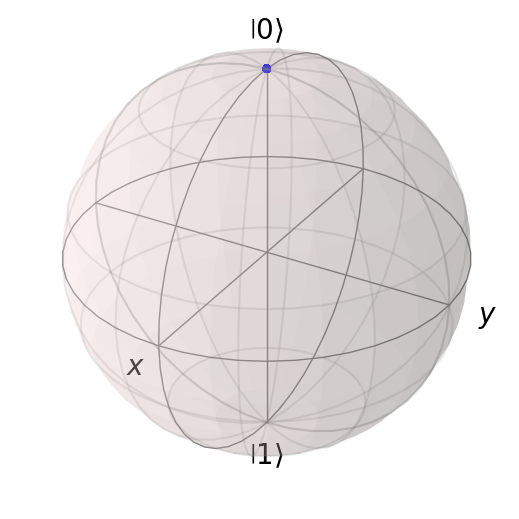

In [23]:
kraus(K_amp, pnts0)

We see that all pure states approach the state $|0\rangle$. This aligns with the analytical calculations we performed in the lecture. This is also an expected result since the amplitude damping channel is meant to model energy dissipation. In two-state systems, if $|0\rangle$ is the ground state, then we would expect this channel to reduce all states to the ground state upon repeated application.

### The Depolarizing Channel

Depolarization means that the state approaches the maximally mixed state $\rho=I/2$. The Kraus operators for the depolarizing channel are given by
\begin{equation}
K_0 = \sqrt{1-\frac{3P}{4}}I, \quad\quad K_1 = \sqrt{\frac{P}{4}}\sigma_x, \quad\quad K_2 = \sqrt{\frac{P}{4}}\sigma_y, \quad\quad K_3 = \sqrt{\frac{P}{4}}\sigma_z
\end{equation}

Let us store these Kraus operators with $P=0.5$

In [24]:
K_dp0 = np.sqrt(1-(3*P/4))*I
K_dp1 = np.sqrt(P/4)*X
K_dp2 = np.sqrt(P/4)*Y
K_dp3 = np.sqrt(P/4)*Z
K_dp = np.array([K_dp0, K_dp1, K_dp2, K_dp3])

Now, let us feed the array `K_dp` into our function.

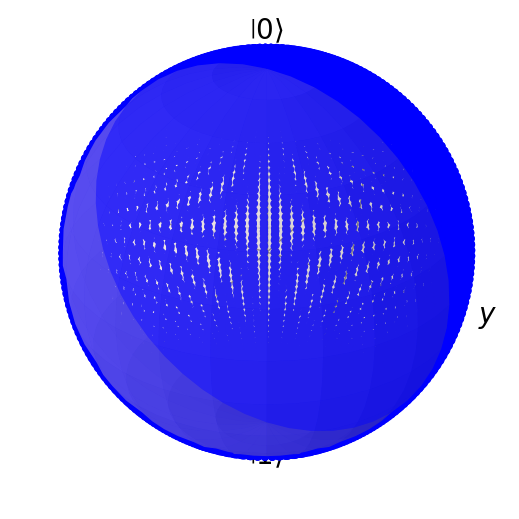

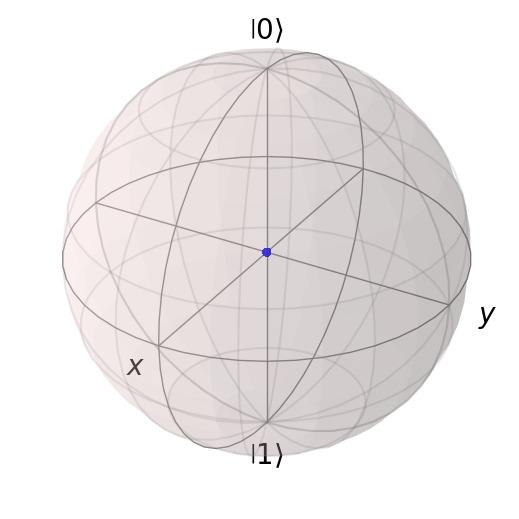

In [25]:
kraus(K_dp, pnts0)

On repeated application of this channel, we see that as expected, all pure states become progressively more mixed and asymptotically approach the maximally mixed state at the centre of the Bloch sphere.

### Combining the Phase Damping and Amplitude Damping Channels

We have now reproduced the known effects of various standard channel on the Bloch sphere. This has told us that our methods are correct. Now, we want to go beyond simply confirming what we already know, and compute the evolution of states on the Bloch sphere for various combinations of the channels we have analysed.

Let us start with combining the phase damping and amplitude damping Kraus operators. Let us say that our new Kraus operators are
\begin{equation}
K_0 = \frac{1}{\sqrt{2}}\sqrt{1-\frac{P}{2}}I, \quad\quad K_1 = \frac{1}{\sqrt{2}}\sqrt{\frac{P}{2}}\sigma_z, \quad\quad K_2 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0\\0 & \sqrt{1-\gamma} \end{pmatrix}, \quad\quad K_3 = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & \sqrt{\gamma}\\0 & 0 \end{pmatrix}
\end{equation}

In [26]:
K_comb1 = np.array([K_ph0, K_ph1, K_amp0, K_amp1])/np.sqrt(2)

We can first check if this set of Kraus operators is valid, i.e. it follows the condition
\begin{equation}
\sum_\alpha K_\alpha^\dagger K_\alpha = 1
\end{equation}
To do this, we can employ our function `is_kraus`

In [27]:
is_kraus(K_comb1)

Yes!


Hence, these seem like a valid set of Kraus operators. Feeding `K_comb1` into `kraus` gives us the following.

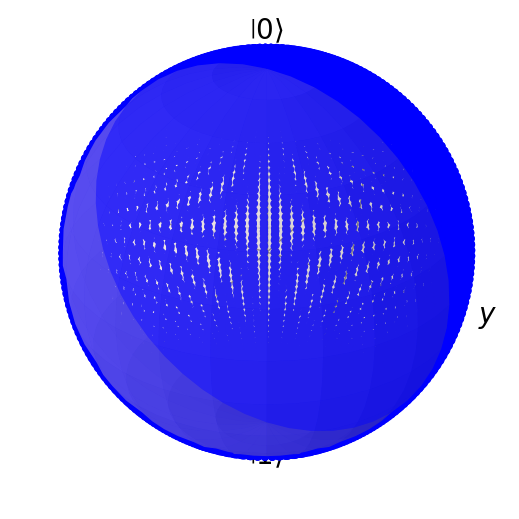

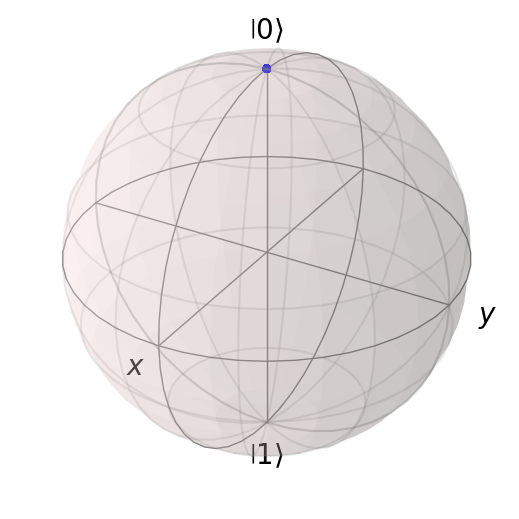

In [28]:
kraus(K_comb1, pnts0)

Thus, we find that under these Kraus operators, the pure states asymptotically approach $|0\rangle$. This is reasonable given that the phase damping channel has the effect of removing the phase of the state and the amplitude damping channel has the effect of evolving all states towards $|0\rangle$.

### Combining the Amplitude Damping and Depolarizing Channels

Now, we can do the same for the amplitude damping and depolarizing channels. The combined Kraus operators are given by
\begin{equation}
K_0 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0\\0 & \sqrt{1-\gamma} \end{pmatrix}, \quad\quad K_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & \sqrt{\gamma}\\0 & 0 \end{pmatrix}, \quad\quad K_2 = \frac{1}{\sqrt{2}}\sqrt{1-\frac{3P}{4}}I, \quad\quad\\ K_3 = \frac{1}{\sqrt{2}}\sqrt{\frac{P}{4}}\sigma_x, \quad\quad K_4 = \frac{1}{\sqrt{2}}\sqrt{\frac{P}{4}}\sigma_y, \quad\quad K_5 = \frac{1}{\sqrt{2}}\sqrt{\frac{P}{4}}\sigma_z
\end{equation}

In [29]:
K_comb2 = np.array([K_amp0, K_amp1, K_dp0, K_dp1, K_dp2, K_dp3])/np.sqrt(2)

We check if this is a valid set of operators.

In [30]:
is_kraus(K_comb2)

Yes!


Now, we feed `K_comb2` into `kraus`.

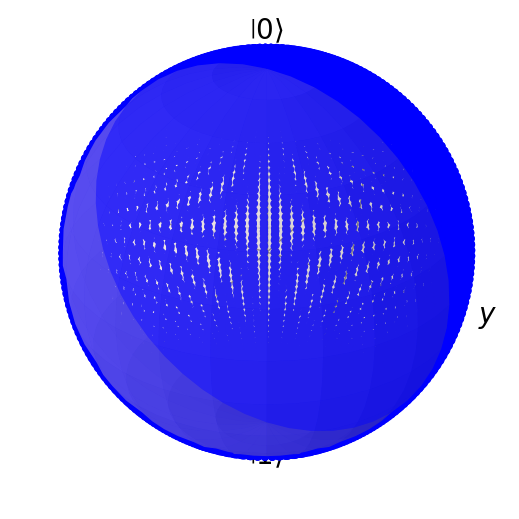

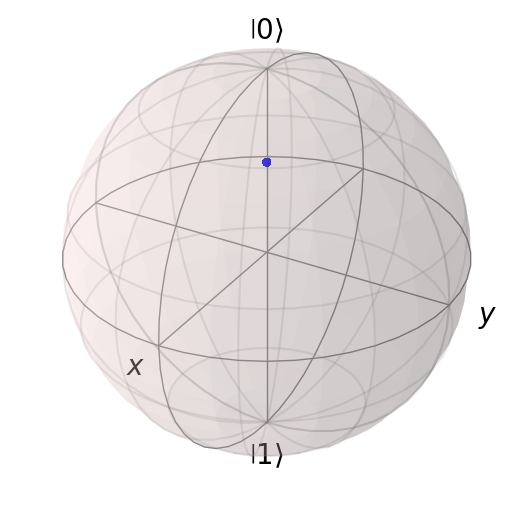

In [31]:
kraus(K_comb2, pnts0)

Thus, we find, interestingly, that under these Kraus operators, pure states approach a state which is mixed but not a maximally mixed state. It is a state that is closer to $|0\rangle$ than $|1\rangle$, showing glimpses of the amplitude damping channel, and is also a mixed state, showing glimpses of the depolarizing channel. Thus, features of both channels are present.

### Conclusion

We have now learnt and understood a robust method for simulating open system dynamics on the Bloch sphere using the Python library QuTiP. This allowed us to visualise the effects of not only standard channels that we discussed in the lectures, but also construct a general function so that we can put in any Kraus operators and observe how the states change in and on the Bloch sphere. As we saw in the last couple of examples, where we analysed combinations of standard channels, this can give us new insights into the behaviour of such combined channels. This has several applications, especially when we want to model certain phenomena in physics where there are multiple factors at play, with various combinations of Kraus operators. Thus, this gives us a new tool to aid our understanding of composite quantum systems.

### Acknowledgements

I would like to thank Prof. Arjendu Pattanayak for suggesting this project to me and for guiding me throughout its duration.

### References

[1] QuTiP Documentation: https://qutip.readthedocs.io/en/qutip-5.0.x/index.html

[2] Prof. Arjendu's lecture notes